<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Italy-Commentary" data-toc-modified-id="Italy-Commentary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Italy Commentary</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Fit-Model" data-toc-modified-id="Fit-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fit Model</a></span></li><li><span><a href="#Display-Actual-vs-Prediction" data-toc-modified-id="Display-Actual-vs-Prediction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Display Actual vs Prediction</a></span></li><li><span><a href="#Commentary" data-toc-modified-id="Commentary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Commentary</a></span><ul class="toc-item"><li><span><a href="#21st-May" data-toc-modified-id="21st-May-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>21st May</a></span></li><li><span><a href="#10th-May" data-toc-modified-id="10th-May-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>10th May</a></span></li><li><span><a href="#17th-April" data-toc-modified-id="17th-April-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>17th April</a></span></li><li><span><a href="#12th-April" data-toc-modified-id="12th-April-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>12th April</a></span></li><li><span><a href="#11th-April" data-toc-modified-id="11th-April-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>11th April</a></span></li><li><span><a href="#10th-April" data-toc-modified-id="10th-April-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>10th April</a></span></li><li><span><a href="#5th-April" data-toc-modified-id="5th-April-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>5th April</a></span></li><li><span><a href="#30th-March" data-toc-modified-id="30th-March-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>30th March</a></span></li></ul></li></ul></div>

## Italy Commentary
All countries in Europe watch Italy closely each day: Their today will be our tomorrows. The same could also be said of USA, but on a large scale.

## Load data

In [1]:
import sys
from os import path
sys.path.append(path.pardir)
from src.covid import CovidCountry
import pandas as pd

# Get our Country model data
country = 'Italy'
filepath = '../data/raw/'

# Load and fix Italy data
fix_data  = {'2020-03-12': 15113,
             '2020-03-23': 63927,
              }

it = CovidCountry(country=country,
                  filepath=filepath,
                  fixes=fix_data)

it.load()

## Fit Model

In [2]:
it.fit(curve='gamma')
it_df = it.predict()
it.save(filepath='../data/processed/')

In [3]:
# Show small window of prediction and actual
it_df[pd.Timestamp.now().date()-pd.Timedelta('3D'):].diff()[1:6]

,Actual,Prediction
Date,,
2020-07-18,249.0,NaN
2020-07-19,218.0,NaN


## Display Actual vs Prediction

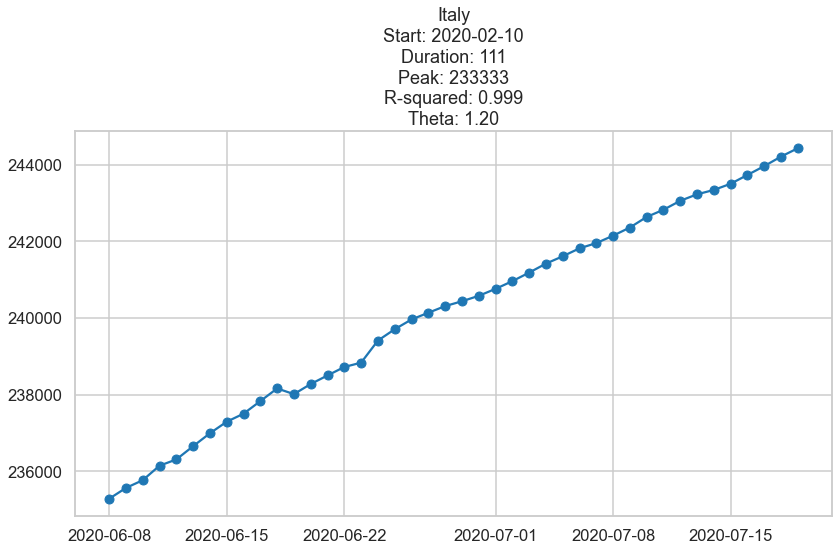

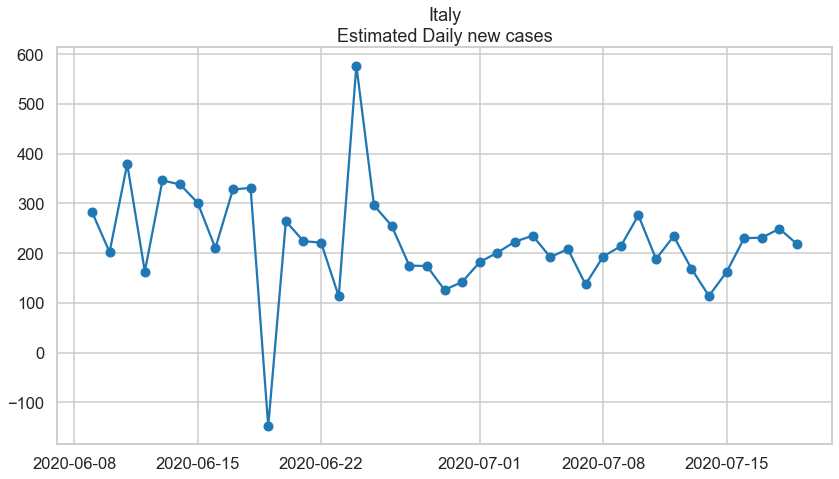

In [4]:
it.display(offset=42)

## Commentary
### 21st May
Model tune - slightly longer duration guess.

### 10th May
Model tune - slightly longer duration.

### 17th April
The down slope is a bit closer to where I expected. It is much shallower, and as a consequence longer.

### 12th April
Tuning done - I'm using the mu/theta combination of the gamma pdf so that it is easy to give it half the duration as a starting point for the mean. The fit is fantastic now against most countries close to, or passed their peak daily cases.

### 11th April
The skew is a much better fit on the curve descent, but I suspect it will take a big more tuning to get the shape right: It looks like it still needs to be a little less steep on the descent. The next week will help dial it in.

### 10th April
I really need to fit another curve for the post lock-down effect. It makes the curve lower, but also much longer. I keep adding days to the duration as Italy has produce 4000 cases a day, give or take, for nearly 14 days. The initial curve would have been much higher, but a lot narrower in duration.

### 5th April
Italy might be better fit with a skew in the daily case distribution. I can make a case that the lockdown takes a while to change the rate of change, and that manifests as a much steeper climb and a gradual descent. The gradual descent is actually pretty painful, as it starts at the peak, but reduces at a slower speed, increasing the total cases over the duration quite a lot.

### 30th March
Italy shares a lot in common with the UK - the same population, the same area, and similar population densities. The most interesting thing about Italy statistically, is I can only fit the middle of the curve, if we I start much earlier than other countries.

With other countries, I set the start as the day that begins day on day case increases. In Italy's case, this is 9 days before that. Perhaps there was a change in testing strategy? Or some time where the virus spread without measurement?

As of 30th March, they are nearly a week beyond their peak daily cases. Deaths lag, so are likely to keep increasing for a period of time. Their duration should set the benchmark for other countries, especially in Europe - however, even at this early stage some countries appear to be quicker (Spain), or much slower (Sweden). It will be interesting to see how that pattern develops, and whether those countries all revert back to the Italian duration.
